In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/SOP-ALZ LINGUISTICS/Datasets")


In [ ]:
import pandas as pd

df = pd.read_csv('train2.csv')
#index_names = df[ (df['Group'] == "MCI") | (df['Group'] == "PossibleAD") | (df['Group'] == "Memory") | (df['Group'] == "Vascular")].index 
  
#df.drop(index_names, inplace=True)
df['Group'].value_counts()

ProbableAD    762
Control       243
MCI           162
PossibleAD     68
Vascular       20
Memory         12
Name: Group, dtype: int64

In [ ]:
df.head()


,Age,Sex,Group,Duration_(sec),MLU_Utts,MLU_Morphemes,FREQ_TTR,Words_Min,Verbs_Utt,%_Word_Errors,Utt_Errors,density,%_Nouns,%_Plurals,%_Verbs,%_Aux,%_Mod,%_3S,%_13S,%_PAST,%_PASTP,%_PRESP,%_prep,%_adj,%_adv,%_conj,%_det,%_pro,noun_verb,retracing,repetition,mor_Utts,mor_syllables,syllables_min,%_Prolongation,Mean_RU,%_Phonological_fragment,%_Phrase_repetitions,%_Word_revisions,%_Phrase_revisions,%_Pauses,%_Filled_pauses,%_TD,SLD_Ratio,Content_words_ratio,Function_words_ratio,N,V,Q,S
0,58.0,0,Control,56,16,9.250,0.523,141.429,1.563,0.000,1,0.371,25.000,21.212,18.939,5.303,0.758,52.000,0.000,0.000,8.000,24.000,9.848,6.061,6.061,0.000,15.909,5.303,1.320,1,2,18.0,176.0,178.983,0.000,1.0,0.0,0.568,0.000,0.568,0.0,0.0,1.136,0.333,0.0,0.014,19.000000,19.000000,8.000000,15.000000
1,59.0,0,Control,65,14,7.714,0.490,94.154,1.067,0.000,2,0.353,29.412,20.000,15.686,7.843,0.000,68.750,0.000,0.000,0.000,50.000,3.922,6.863,3.922,0.000,14.706,6.863,1.875,1,0,15.0,131.0,120.923,0.000,0.0,0.0,0.000,0.000,0.763,0.0,0.0,0.763,0.000,0.0,0.000,17.000000,16.000000,8.000000,16.000000
2,60.0,0,Control,62,14,12.071,0.469,140.323,1.571,0.000,1,0.400,21.379,29.032,15.862,6.207,0.690,60.870,0.000,0.000,4.348,30.435,9.655,6.207,8.276,2.759,14.483,6.897,1.348,0,1,16.0,195.0,172.059,0.000,1.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,1.000,0.0,0.012,16.815287,17.732484,9.866242,14.993631
3,61.0,0,Control,89,11,17.091,0.503,111.236,2.818,0.000,0,0.491,19.394,12.500,21.818,3.636,1.212,16.667,19.444,47.222,13.889,25.000,4.242,4.242,7.273,1.818,12.727,9.697,0.889,2,1,12.0,217.0,143.077,0.000,0.0,0.0,0.461,0.922,0.000,0.0,0.0,1.382,0.000,0.0,0.000,18.000000,28.000000,14.000000,22.000000
4,72.0,1,Control,34,13,7.846,0.568,155.294,1.000,1.136,1,0.386,26.136,17.391,15.909,10.227,0.000,100.000,0.000,0.000,7.143,57.143,7.955,3.409,4.545,1.136,15.909,6.818,1.643,1,0,14.0,113.0,183.243,0.885,0.0,0.0,0.000,0.885,0.000,0.0,0.0,0.885,0.500,0.0,0.000,18.000000,18.000000,8.000000,13.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
col_names=df.columns.tolist()

x_colnames=col_names.copy()
x_colnames.remove('Group')



x=df.loc[:, x_colnames].values
y=df.loc[:,[col_names[2]]].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape, y_train.shape)

(1013, 49) (1013, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Control       0.61      0.93      0.74        54
         MCI       0.38      0.19      0.26        31
      Memory       0.00      0.00      0.00         2
  PossibleAD       0.00      0.00      0.00        18
  ProbableAD       0.73      0.79      0.76       144
    Vascular       0.00      0.00      0.00         5

    accuracy                           0.67       254
   macro avg       0.29      0.32      0.29       254
weighted avg       0.59      0.67      0.62       254



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 50   1   0   0   3   0]
 [  9   6   0   0  16   0]
 [  1   0   0   0   1   0]
 [  0   1   0   0  17   0]
 [ 22   8   0   0 114   0]
 [  0   0   0   0   5   0]]


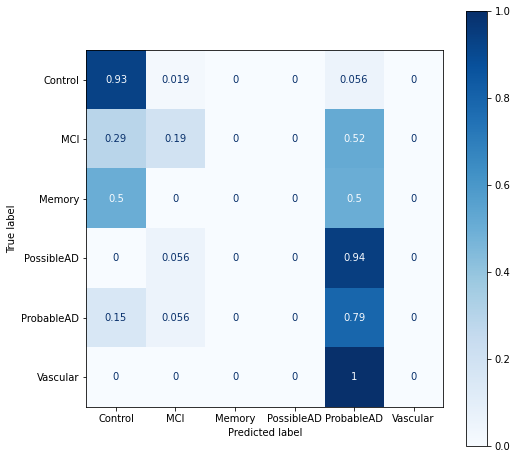

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8, 8))
# 4,4 for binary and 8,8 for multiclass looks good

plot_confusion_matrix(classifier, x_test, y_test, normalize = 'true', cmap=plt.cm.Blues, ax = ax)

plt.show()